In [28]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
import math
import hydroeval as he
import os
from sklearn import linear_model

In [29]:
file_path=r'C:\Users\info\Desktop\Taiwo Folder\Python codes\Predict Accident Frequency\Accident_Frequency_Prediction\Accident_dataset.xlsx'
df=pd.read_excel(file_path)

In [30]:
df=df.drop(columns='Unnamed: 7')

In [31]:
df.head(5)

,DISTANCE,LOCATION,ACCIDENT FREQUENCY,AVERAGE DAILY TRAFFIC,SHOULDER,PAVEMENT,MEDIAN
0,KM 129,ORIENTAL,6,3480,2.8,12.0,5.4
1,KM19,OREMEJI,2,3480,2.8,12.0,5.4
2,KM 123,QUARRY,14,3480,1.0,12.0,5.4
3,KM 125,GURUMARAJI,17,3480,1.0,12.0,5.4
4,KM 127,DOMINION,20,3480,1.0,12.0,5.4


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DISTANCE               28 non-null     object 
 1   LOCATION               28 non-null     object 
 2   ACCIDENT FREQUENCY     28 non-null     int64  
 3   AVERAGE DAILY TRAFFIC  28 non-null     int64  
 4   SHOULDER               28 non-null     float64
 5   PAVEMENT               28 non-null     float64
 6   MEDIAN                 28 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ KB


In [33]:
df['DISTANCE'].unique()

array(['KM 129', 'KM19', 'KM 123', 'KM 125', 'KM 127', 'KM 94', 'KM 115',
       'KM 10', 'KM 8', 'KM 124', 'KM 122', 'KM 132', 'KM 16', 'KM 126',
       'KM 25', 'KM 6', 'KM 7', 'KM 120', 'KM 11', 'KM 112', 'KM 21',
       'KM 128', 'KM 100', 'KM 118', 'KM 121', 'KM 2', 'KM 30'],
      dtype=object)

In [34]:
#CLeaning distance Column
df['DISTANCE']=df['DISTANCE'].str.replace('KM','').str.strip()
df['DISTANCE']=df['DISTANCE'].astype('int')

In [35]:
df.describe()

,DISTANCE,ACCIDENT FREQUENCY,AVERAGE DAILY TRAFFIC,SHOULDER,PAVEMENT,MEDIAN
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,74.857143,4.928571,3994.285714,2.503571,10.164286,5.492857
std,53.651630,4.898439,1265.930864,1.005718,2.458577,0.108623
min,2.000000,1.000000,2490.000000,1.000000,8.000000,5.400000
25%,18.250000,2.000000,3480.000000,1.225000,8.000000,5.400000
50%,106.000000,3.000000,3480.000000,3.000000,8.300000,5.500000
75%,123.250000,6.250000,4680.000000,3.000000,12.000000,5.500000
max,132.000000,20.000000,5940.000000,4.000000,15.000000,5.800000


In [36]:
#Highest Accident Frequency by location
df['ACCIDENT FREQUENCY']=df['ACCIDENT FREQUENCY'].sort_values()
top_accident_frequency =df.sort_values(by='ACCIDENT FREQUENCY').tail(6)


Text(0.5, 1.0, 'Highest Accident Frequency by Location')

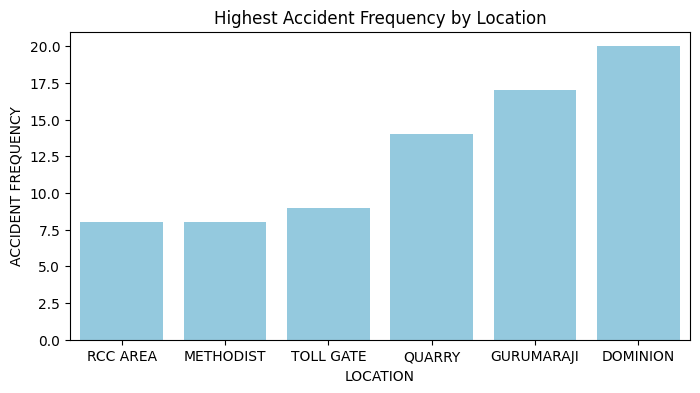

In [60]:
plt.figure(figsize=(8, 4))
sns.barplot(top_accident_frequency , x='LOCATION',y='ACCIDENT FREQUENCY',color='skyblue')
plt.title('Highest Accident Frequency by Location')

In [48]:
#Lowest Accident Frequency by location
df['ACCIDENT FREQUENCY']=df['ACCIDENT FREQUENCY'].sort_values()
lowest_accident_frequency =df.sort_values(by='ACCIDENT FREQUENCY').head(5)
lowest_accident_frequency


,DISTANCE,LOCATION,ACCIDENT FREQUENCY,AVERAGE DAILY TRAFFIC,SHOULDER,PAVEMENT,MEDIAN
27,30,BAT COMPANY,1,5940,1.3,12.0,5.4
25,121,KARA,1,5940,3.0,15.0,5.7
23,25,GUSTAB,1,5940,3.0,8.0,5.5
26,2,EAGLE FLOUR,1,5940,3.0,15.0,5.7
12,16,SEKO,1,4260,3.0,8.0,5.5


C:\Users\info\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Lowest Accident Frequency by Location')

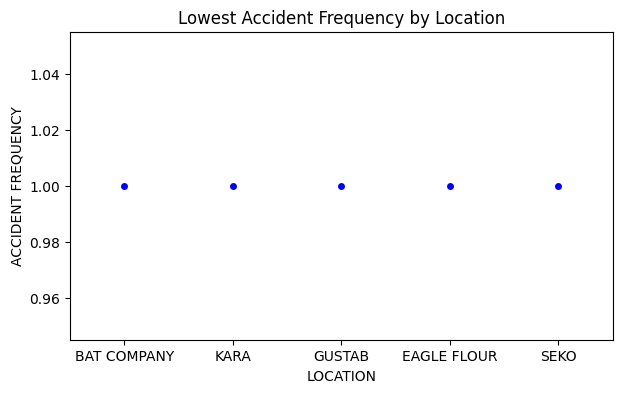

In [67]:
plt.figure(figsize=(7,4))
sns.barplot(lowest_accident_frequency, x='LOCATION',y='ACCIDENT FREQUENCY',colo='skyblue'
plt.title('Lowest Accident Frequency by Location')

In [50]:
#Scaling Average Daily Traffic
max_traffic=df['AVERAGE DAILY TRAFFIC'].max()
df['AVERAGE DAILY TRAFFIC']=df['AVERAGE DAILY TRAFFIC']/max_traffic

In [51]:
#Scaling Average Distance
max_distance=df['DISTANCE'].max()
df['AVERAGE DAILY TRAFFIC']=df['AVERAGE DAILY TRAFFIC']/max_distance

In [15]:
#Encoding Location
label_encoder=LabelEncoder()
df['LOCATION_encoded']=label_encoder.fit_transform(df['LOCATION'])
df=df.drop(columns='LOCATION')
df.head(5)

,DISTANCE,ACCIDENT FREQUENCY,AVERAGE DAILY TRAFFIC,SHOULDER,PAVEMENT,MEDIAN,LOCATION_encoded
0,129,6,0.004438,2.8,12.0,5.4,19
1,19,2,0.004438,2.8,12.0,5.4,18
2,123,14,0.004438,1.0,12.0,5.4,20
3,125,17,0.004438,1.0,12.0,5.4,9
4,127,20,0.004438,1.0,12.0,5.4,6


In [16]:
target='ACCIDENT FREQUENCY'
y=df[target]
X=df.drop(columns=target, axis=1)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8, shuffle=True)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(19, 6)
(19,)
(9, 6)
(9,)


(None, None)

In [18]:
X_train.to_csv(r"C:\Users\info\Desktop\Taiwo Folder\Python codes\Predict Accident Frequency\Accident_Frequency_Prediction\x_train.csv", index=False)
y_train.to_csv(r"C:\Users\info\Desktop\Taiwo Folder\Python codes\Predict Accident Frequency\Accident_Frequency_Prediction\y_train.csv", index=False)
X_test.to_csv(r"C:\Users\info\Desktop\Taiwo Folder\Python codes\Predict Accident Frequency\Accident_Frequency_Prediction\x_test.csv", index=False)
y_test.to_csv(r"C:\Users\info\Desktop\Taiwo Folder\Python codes\Predict Accident Frequency\Accident_Frequency_Prediction\y_test.csv", index=False)

In [19]:
os.chdir(r"C:\Users\info\Desktop\Taiwo Folder\Python codes\Predict Accident Frequency\Accident_Frequency_Prediction")
os.getcwd()

X_train=pd.read_csv('x_train.csv')
y_train=pd.read_csv('y_train.csv')
X_test=pd.read_csv('x_test.csv')
y_test=pd.read_csv('y_test.csv')

In [20]:
X_train = X_train.loc[:, ~X_train.columns.str.contains('^Unnamed')]
y_train = y_train.loc[:, ~y_train.columns.str.contains('^Unnamed')]
X_test =  X_test.loc [:, ~X_test.columns.str.contains('^Unnamed')]
y_test =  y_test.loc [:, ~y_test.columns.str.contains('^Unnamed')]

In [21]:
# Ensuring y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
y_train

array([ 9,  5, 14,  3,  3,  1,  2,  4,  1,  2,  2,  2,  7,  8,  3,  3,  5,
        3, 17], dtype=int64)

In [22]:
# Initialize the Random Forest regressor
model_RF = RandomForestRegressor()

# Fit the model to the training data
model_RF.fit(X_train, y_train)
y_pred_train=model_RF.predict(X_train)

print('Training_set')
print('MAE:',metrics.mean_absolute_error(y_train,y_pred_train))
print('MSE:',metrics.mean_squared_error(y_train,y_pred_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
print('R_Sqd:',r2_score(y_train,y_pred_train))
print('Cor:',math.sqrt(r2_score(y_train,y_pred_train)))
print ('NSE is:', he.evaluator(he.nse, y_train, y_pred_train))

# Fit the model to the test data
model_RF.fit(X_test, y_test)
y_pred_test=model_RF.predict(X_test)
print('')
print('Test_set')
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print('R_Sqd:',r2_score(y_test,y_pred_test))
print('Cor:',math.sqrt(r2_score(y_test,y_pred_test)))
print ('NSE is:', he.evaluator(he.nse,y_test,y_pred_test))






Training_set
MAE: 1.125263157894737
MSE: 1.8708631578947368
RMSE: 1.3677949984901747
R_Sqd: 0.8963502762430939
Cor: 0.9467577706272571
NSE is: [0.82249276]

Test_set
MAE: 1.7077777777777778
MSE: 7.127122222222223
RMSE: 2.669667062055159
R_Sqd: 0.789614832361516
Cor: 0.8886027415901416
NSE is: [0.52796069]


In [ ]:
# Initialize the Lasso regressor
Lasso_reg = linear_model.Lasso(alpha=0.001,max_iter=100, tol=0.001)

# Fit the model to the training data
Lasso_reg.fit(X_train, y_train)
y_pred_train=Lasso_reg.predict(X_train)

print('Training_set')
print('MAE:',metrics.mean_absolute_error(y_train,y_pred_train))
print('MSE:',metrics.mean_squared_error(y_train,y_pred_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
print('R_Sqd:',r2_score(y_train,y_pred_train))
print('Cor:',math.sqrt(r2_score(y_train,y_pred_train)))
print ('NSE is:', he.evaluator(he.nse, y_train, y_pred_train))

# Fit the model to the test data
Lasso_reg.fit(X_test, y_test)
y_pred_test=Lasso_reg.predict(X_test)
print('')
print('Test_set')
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print('R_Sqd:',r2_score(y_test,y_pred_test))
print('Cor:',math.sqrt(r2_score(y_test,y_pred_test)))
print ('NSE is:', he.evaluator(he.nse,y_test,y_pred_test))






Training_set
MAE: 1.9468065492219295
MSE: 7.356092376682936
RMSE: 2.7122117131011243
R_Sqd: 0.5924571289161235
Cor: 0.7697123676517894
NSE is: [0.25194787]

Test_set
MAE: 1.5506518554361481
MSE: 3.832644876828616
RMSE: 1.957714196921659
R_Sqd: 0.8868643458370562
Cor: 0.9417347534401904
NSE is: [0.85736059]


In [25]:
# Initialize the Ridge regressor
ABR_model = AdaBoostRegressor()

# Fit the model to the training data
ABR_model.fit(X_train, y_train)
y_pred_train=ABR_model.predict(X_train)

print('Training_set')
print('MAE:',metrics.mean_absolute_error(y_train,y_pred_train))
print('MSE:',metrics.mean_squared_error(y_train,y_pred_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
print('R_Sqd:',r2_score(y_train,y_pred_train))
print('Cor:',math.sqrt(r2_score(y_train,y_pred_train)))
print ('NSE is:', he.evaluator(he.nse, y_train, y_pred_train))

# Fit the model to the test data
ABR_model.fit(X_test, y_test)
y_pred_test=ABR_model.predict(X_test)
print('')
print('Test_set')
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print('R_Sqd:',r2_score(y_test,y_pred_test))
print('Cor:',math.sqrt(r2_score(y_test,y_pred_test)))
print ('NSE is:', he.evaluator(he.nse,y_test,y_pred_test))






Training_set
MAE: 0.6070175438596492
MSE: 0.6437406138620715
RMSE: 0.8023344775479061
R_Sqd: 0.9643354263959165
Cor: 0.9820058179032936
NSE is: [0.96178644]

Test_set
MAE: 0.29629629629629634
MSE: 0.271604938271605
RMSE: 0.5211573066470477
R_Sqd: 0.9919825072886297
Cor: 0.9959831862479556
NSE is: [0.99156514]


In [ ]:
#Dictionary Containing R2_score for test and train set
R2_scores_train={'RandomForest':0.92,
'Lasso': 0.59,
'AdaBoost':0.96}

R2_scores_test={'RandomForest':0.79,
'Lasso': 0.88,
'AdaBoost':0.99}

In [ ]:
#Convert the dictionary to a pandas DataFrame
data1 = pd.DataFrame(list(R2_scores_train.items()), columns=['Model', 'R2 Score_train'])

data2 = pd.DataFrame(list(R2_scores_test.items()), columns=['Model', 'R2 Score_test'])

data=pd.merge(data1,data2,on='Model')
data

,Model,R2 Score_train,R2 Score_test
0,RandomForest,0.92,0.79
1,Lasso,0.59,0.88
2,AdaBoost,0.96,0.99
